In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import keras
import os
from pathlib import Path
from matplotlib import image
import numpy as np
import cv2

In [4]:
#Datasets Path
dir_path = '../input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages'
dir_categories = ['Cat', 'Dog']
desired_size = 55
training_data = []

def read_data_trial():
    for category in dir_categories:
        path = os.path.join(dir_path, category)
        class_category = dir_categories.index(category)
        for item in os.listdir(path):
            image_array = cv2.imread(os.path.join(path,item), cv2.IMREAD_GRAYSCALE)
            print(image_array, class_category)
            plt.imshow(image_array, cmap='gray')
            plt.show()
            break
        break
        
def store_training_data():
    for category in dir_categories:
        path = os.path.join(dir_path, category)
        class_category = dir_categories.index(category)
        for item in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path,item), cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(image_array, (desired_size, desired_size))
                training_data.append([resized_image, class_category])
            except Exception as e:
                pass
            
store_training_data()

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


In [5]:
import random
random.shuffle(training_data)

In [6]:
Features = []
Targets = []
for feature, target in training_data:
    Features.append(feature)
    Targets.append(target)

In [7]:
Features = np.array(Features).reshape(len(Features),desired_size,desired_size,1)

In [8]:
Targets = np.array(Targets)

In [9]:
np.save(os.path.join('./', 'Feature_Data'), Features)
np.save(os.path.join('./', 'Targets_Data'), Targets)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

(24913, 55, 55, 1)


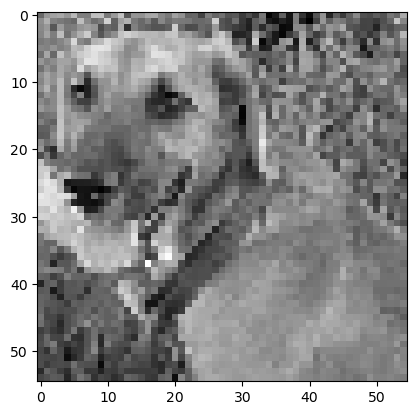

In [11]:
Feature_data = np.load('./Feature_Data.npy')
Target_data = np.load('./Targets_Data.npy')
print(Feature_data.shape)
Feature_data = Feature_data/255.0
plt.imshow(Feature_data[0],cmap = 'gray')

In [15]:
n_features = Feature_data.shape[1:]
model =Sequential()
model.add(Conv2D(100,(3,3),activation = 'relu', input_shape = n_features))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(100,(3,3),activation = 'relu',input_shape = n_features))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(100,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['Accuracy'])
early_stop = EarlyStopping(patience = 3)
model.fit(Feature_data, Target_data, epochs = 10, validation_split = 0.2, callbacks = [early_stop])


Epoch 1/10
623/623 [==============================] - 159s 254ms/step - loss: 0.6187 - Accuracy: 0.6506 - val_loss: 0.5615 - val_Accuracy: 0.7054
Epoch 2/10
623/623 [==============================] - 158s 254ms/step - loss: 0.5156 - Accuracy: 0.7451 - val_loss: 0.4831 - val_Accuracy: 0.7758
Epoch 3/10
623/623 [==============================] - 157s 253ms/step - loss: 0.4660 - Accuracy: 0.7792 - val_loss: 0.4879 - val_Accuracy: 0.7772
Epoch 4/10
623/623 [==============================] - 157s 252ms/step - loss: 0.4215 - Accuracy: 0.8052 - val_loss: 0.4692 - val_Accuracy: 0.7803
Epoch 5/10
623/623 [==============================] - 157s 252ms/step - loss: 0.3844 - Accuracy: 0.8253 - val_loss: 0.4469 - val_Accuracy: 0.7927
Epoch 6/10
623/623 [==============================] - 158s 254ms/step - loss: 0.3318 - Accuracy: 0.8542 - val_loss: 0.4462 - val_Accuracy: 0.8047
Epoch 7/10
623/623 [==============================] - 158s 253ms/step - loss: 0.2812 - Accuracy: 0.8786 - val_loss: 0.4621 -

In [20]:
def predict_new_image(path):
    try_data_path = path
    try_data = cv2.imread(try_data_path, cv2.IMREAD_GRAYSCALE)
    
    #Resizing the image and reshaping the image so it can pass the Convolutional Layer as a 4D arrays
    resized_try_data = cv2.resize(try_data, (desired_size, desired_size))
    try_data_resized = resized_try_data.reshape(1, desired_size, desired_size, 1)

    #Check the shape of the resized image arrays
    print(try_data_resized.shape)
    plt.imshow(try_data_resized[0], cmap='gray')
    
    #Declare the new data as Xnew
    Xnew = try_data_resized
    # make a prediction using the trained models
    ynew = model.predict(Xnew)
    # show the predicted Outputs
    if ynew[0] == 0:
        print("Predicted=%s" % ('Cat'))
    else:
        print("Predicted=%s" % ('Dog'))